In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from IPython.display import clear_output, display
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
# Load the CPP Profile Predicted 1534 proteins .csv
df_predicted = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/BA_documents/1.Task_BA/Human_N_Out_Proteome.csv')
df = df_predicted.drop(['organism', 'dataset', 'class', 'gene_name',
                        'new_hc_substrate', 'substrate_homolog', 'human_n-out_proteome', 
                        'topology','subcellular_location','sheddase'], axis=1)
df.head(5)

,entry,name,PRED_MEAN [%],PRED_STD [%],pred_class,length,len_signal_pep,len_top_n,len_tmd,len_top_c,jmd_n,tmd,jmd_c,tmd_AN,len_tmd_AN
0,P16150,LEUK_HUMAN,95.22,2.02,HC substrate,400,19,234,23,124,PFRNPDENSR,GMLPVAVLVALLAVIVLVALLLL,WRRRQKRRTG,UP,23
1,P28827,PTPRM_HUMAN,94.79,2.09,HC substrate,1452,20,722,22,688,PEKQTDHTVK,IAGVIAGILLFVIIFLGVVLVM,KKRKLAKKRK,UP,22
2,P10586,PTPRF_HUMAN,94.64,2.03,HC substrate,1907,29,1234,21,623,QQQEEPEMLW,VTGPVLAVILIILIVIAILLF,KRKRTHSPSS,UP,21
3,Q06418,TYRO3_HUMAN,94.49,2.14,HC substrate,890,40,389,21,440,QGPPHSRTSW,VPVVLGVLTALVTAAALALIL,LRKRRKETRF,UP,21
4,P54764,EPHA4_HUMAN,94.39,2.26,HC substrate,986,19,528,22,417,RIIGDGANST,VLLVSVSGSVVLVVILIAAFVI,SRRRSKYSKA,UP,22


In [8]:
df_alpha_cleavage = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/BA_documents/1.Task_BA/Average_cleavage_region_11AA_Pathogenicity.csv')
df_esm_cleavage = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/BA_documents/1.Task_BA/Average_cleavage_region_LLR_EMS_11AA.csv')
df_alpha_cleavage.head(15)

,entry,avg_tmd_pathogenicity,pred_class,PRED_MEAN [%]
0,P16150,0.559603,HC substrate,95.22
1,P28827,0.732974,HC substrate,94.79
2,P10586,0.850696,HC substrate,94.64
3,Q06418,0.586456,HC substrate,94.49
4,P54764,0.688988,HC substrate,94.39
5,P19022,0.814118,HC substrate,94.37
6,O60469,0.494589,HC substrate,94.34
7,Q14118,0.866442,HC substrate,94.24
8,P09603,0.595072,HC substrate,94.07
9,P23468,0.911987,HC substrate,93.84


In [9]:
df_esm_cleavage.head(15)

,entry,avg_tmd_llr_raw,pred_class,PRED_MEAN [%]
0,P16150,-10.343882,HC substrate,95.22
1,P28827,-14.079473,HC substrate,94.79
2,P10586,-12.606491,HC substrate,94.64
3,Q06418,-7.591450,HC substrate,94.49
4,P54764,-11.302436,HC substrate,94.39
5,P19022,-12.728232,HC substrate,94.37
6,O60469,-10.168568,HC substrate,94.34
7,Q14118,-11.036727,HC substrate,94.24
8,P09603,-8.988359,HC substrate,94.07
9,P23468,-15.338645,HC substrate,93.84


In [10]:
alpha_y = df_alpha_cleavage['avg_tmd_pathogenicity']
alpha_x = df_alpha_cleavage['PRED_MEAN [%]']

esm_y = df_esm_cleavage['avg_tmd_llr_raw']
esm_x = df_esm_cleavage['PRED_MEAN [%]']

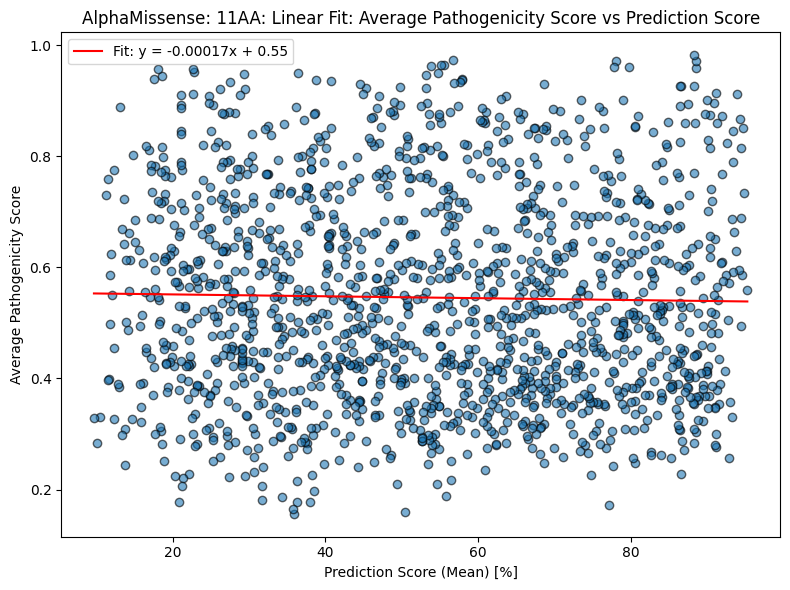

In [16]:
# Fit line: y = mx + b
m, b = np.polyfit(alpha_x, alpha_y, 1)

plt.figure(figsize=(8, 6))
plt.scatter(alpha_x, alpha_y, alpha=0.6, edgecolor='k')
plt.plot(alpha_x, m*alpha_x + b, color='red', label=f"Fit: y = {m:.5f}x + {b:.2f}")
plt.xlabel("Prediction Score (Mean) [%]")
plt.ylabel("Average Pathogenicity Score")
plt.title("AlphaMissense: 11AA: Linear Fit: Average Pathogenicity Score vs Prediction Score")
plt.legend()
plt.tight_layout()
plt.show()


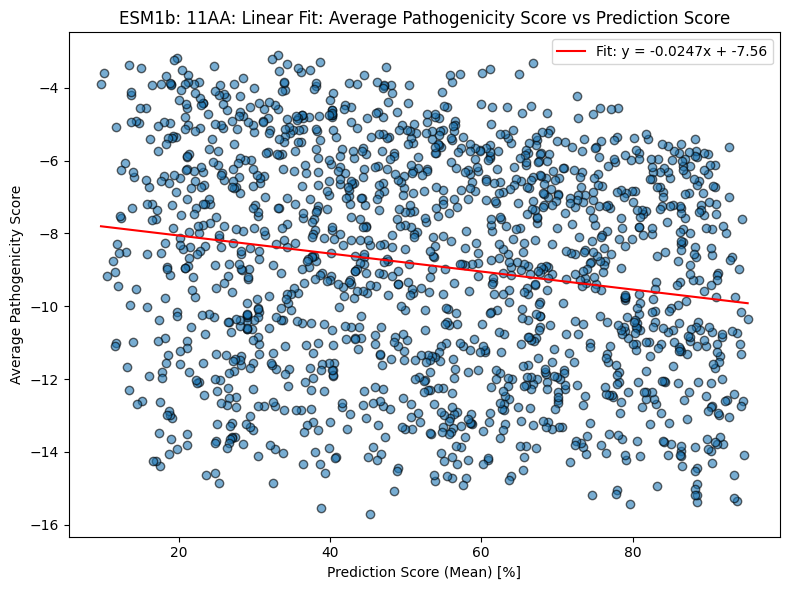

In [17]:
# Fit line: y = mx + b
m, b = np.polyfit(esm_x, esm_y, 1)

plt.figure(figsize=(8, 6))
plt.scatter(esm_x, esm_y, alpha=0.6, edgecolor='k')
plt.plot(esm_x, m*esm_x + b, color='red', label=f"Fit: y = {m:.4f}x + {b:.2f}")
plt.xlabel("Prediction Score (Mean) [%]")
plt.ylabel("Average Pathogenicity Score")
plt.title("ESM1b: 11AA: Linear Fit: Average Pathogenicity Score vs Prediction Score")
plt.legend()
plt.tight_layout()
plt.show()
